# Radial Fall

* Radial fall refers to the motion of an object toward a massive celestial body along a radial trajectory, typically influenced by gravitational forces. This concept is fundamental in understanding the behavior of objects, such as stars, planets, or particles, as they move under the influence of gravity.
* As an object undergoes radial fall, it experiences an increasing gravitational force, leading to an acceleration toward the massive body. The gravitational potential energy decreases as the object falls closer to the massive body. Radial fall is governed by the inverse square law, where the force and acceleration depend inversely on the square of the radial distance.

  ## Gravitational Force
  > $F = \frac{G \cdot M \cdot m}{r^2}$

  where:

  $F$: the gravitational force

  $G$: the gravitational constant

  $M$: the mass of the celestial body

  $m$: the mass of the falling object or secondary body

  $r$: the radial distance between the centers of mass

  ## Gravitational Potential Energy
  > $U = -\frac{G \cdot M \cdot m}{r}$

  where:

  $U$: potential energy

  ## Acceleration Due to Gravity
  > $a = \frac{G \cdot M}{r^2}$

  where:

  $a$: acceleration

* In terms of the vertical height ($h$) above surface:
> $h = r - R_{\text{E}}$

  $h^{..} = - \frac{GM_{E}}{(R_{E}+h)^2}$

* Assuming a total energy $E=0$(zero velocity at infinity), energy conservation implies:

  > $\text{infall velocity(v)} = -h^{'} = \sqrt{\frac{2GM_{E}}{R_{E}+h}}$

  **In particular, the impact velocity at the surface of Earth (h=0) is** $v_{0} = \sqrt{\frac{2GM_{E}}{R_{E}+0}} = 11.2$ km/s.

* Even for an object following a non-radial trajectory, we can use the kinetic energy:
  > $E_{\text{kinetic}} = \frac{1}{2} \times mv_{0}^{2}$ to estimate the typical energy gained by an object of mass $m$ falling into the gravity well of Earth.

* To compute the motion of an asteroid in Earth’s atmosphere, the following equation of motion has to be solved (we still assume one-dimensional motion in radial direction):
  > $h^{''} = - \frac{GM_{E}}{(R_{E}+h)^2} + (\frac{1}{2m} \times p_{\text{air}}(h)C_{D}Ah^2)$

  where:

  $A$: $\pi \times R^2$ (cross section area)

  **The asteroid experiences air resistance proportional to the square of its velocity (this law applies to fast-moving objects for which the air flowing around the object becomes turbulent). The asteroid is assumed to be spherical with radius $R$**.

  **The drag coefficient for a spherical body is $C_{D} = 0.5$**.

  The dependence of the density of Earth’s atmosphere on altitude can be approximated by the barometric height formula:
  > $p_{\text{air}}(h) = 1.3 \times \exp(\frac{-h}{8.4})$

  More generally, the barometric height formula is given by:

  > $P(h) = P_0 \left(1 - \frac{L \cdot h}{T_0}\right)^{\frac{g \cdot M}{R \cdot L}}$

  where:

  $P(h)$: the pressure at altitude h

  $P_{0}$: the pressure at sea level (standard atmospheric pressure)

  $L$: the temperature lapse rate (rate of temperature decrease with altitude)

  $T_{0}$: the standard temperature at sea level

  $g$: the acceleration due to gravity

  $M$: the molar mass of Earth's air

  $R$: the universal gas constant

  **The most widely used value is based on the International System of Units (SI), where the universal gas constant is approximately:** $R \approx 8.314 \, \text{J/(mol·K)}$

In [ ]:
%%capture
!pip install numkit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as unit
from astropy.constants import G,M_earth,R_earth
%matplotlib inline
plt.style.use("dark_background")

In [2]:
print(f"Earth Radius: {R_earth}")
print(f"Earth Mass: {M_earth}")
print(f"Gravitational Constant: {G}")

Earth Radius: 6378100.0 m
Earth Mass: 5.972167867791379e+24 kg
Gravitational Constant: 6.6743e-11 m3 / (kg s2)


In [3]:
# asteroid parameters
asteroidRadius = 34*unit.m # radius
asteroidVolume = (4*np.pi/3)*asteroidRadius**3 # volume
asteroidDensity = 2.2e3*unit.kg/unit.m**3 # density
asteroidMass = asteroidDensity*asteroidVolume # mass

In [4]:
h0 = 300*unit.km # we choose 300 km, the internal space station (ISS) orbits Earth 400 km above ground
v0 = np.sqrt(2*G*M_earth/(R_earth+h0))
print(f"Infall Velocity: {v0}")

Infall Velocity: 10925.90459431552 m / s


In [5]:
def RadialFall(timeEnd:int,initialHeight:int or float)->tuple:
  g = 9.81  # Acceleration due to gravity in m/s^2
  timeInterval = np.linspace(0,timeEnd,1000) # time points
  height = initialHeight-0.5*g*timeInterval**2
  return timeInterval,height

In [6]:
timeEnd = 10 # seconds
initialHeight = 100 # meters

In [7]:
timePoints,height = RadialFall(timeEnd,initialHeight)

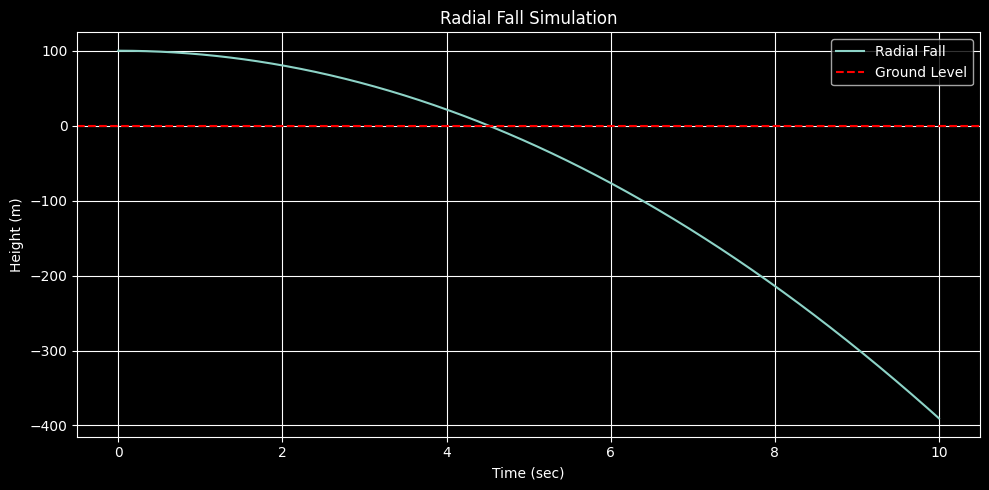

In [8]:
plt.figure(figsize=(10,5))
plt.title("Radial Fall Simulation")
plt.plot(timePoints,height,label="Radial Fall")
plt.xlabel("Time (sec)")
plt.ylabel("Height (m)")
plt.axhline(0,color="red",linestyle="--",label="Ground Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
def AtmosphericPressureAtAltitude(altitude:int or float)->int or float:
  p0 = 101325.0  # Standard atmospheric pressure at sea level in Pascals
  L = 0.0065  # Temperature lapse rate in K/m
  t0 = 288.15  # Standard temperature at sea level in Kelvin
  g = 9.80665  # Acceleration due to gravity in m/s^2
  M = 0.0289644  # Molar mass of Earth's air in kg/mol
  R = 8.31447  # Universal gas constant in J/(mol·K)
  pressure = p0*(1-(L*altitude)/t0)**(g*M/(R*L)) # Barometric height formula
  return pressure

In [11]:
altitude = 5000 # meters

In [12]:
pressure = AtmosphericPressureAtAltitude(altitude)
print(f"At altitude 5000 meters, atmospheric pressure is approximately {pressure:.2f} Pascals.")

At altitude 5000 meters, atmospheric pressure is approximately 54020.53 Pascals.


* The Runge-Kutta method is a numerical integration technique used for solving ordinary differential equations (ODEs), and it's commonly implemented in various programming libraries. We need to express the second derivative, $h^{''}$, as function of $t$, $h$ and $h^{'}$.

In [17]:
from scipy.integrate import odeint

In [18]:
dragCoeff = 0.5 # drag coefficient

In [22]:
# asteroid parameters
asteroidRadius = 34*unit.m # radius
asteroidVolume = (4*np.pi/3)*asteroidRadius**3 # volume
asteroidDensity = 2.2e3*unit.kg/unit.m**3 # density
asteroidMass = asteroidDensity*asteroidVolume # mass
h0 = 300*unit.km # we choose 300 km, the internal space station (ISS) orbits Earth 400 km above ground
v0 = np.sqrt(2*G*M_earth/(R_earth+h0))
print(f"Infall Velocity: {v0}")

Infall Velocity: 10925.90459431552 m / s


In [20]:
# barometric height formula
def BarometricHeightFormula(height:int or float)->int or float:
  return 1.3*np.exp(-height/4.8e3)

In [41]:
 # acceleration of the asteroid
 def AccelerationAsteroid(time:int,height:int or float,hFirstIntegrate:int or float,mass:int or float,radius:int or float)->int or float:
  airResistance = 0.5*BarometricHeightFormula(height)*dragCoeff*np.pi*radius**2*hFirstIntegrate**2
  gravityAtHeight = G.value*M_earth.value/(R_earth.value+height)**2
  return -gravityAtHeight+airResistance/mass

In [42]:
# initial data
data = [[0,h0.to(unit.m).value,-v0.value]]
print(f"Initial Data:\n{data}")

Initial Data:
[[0, 300000.0, -10925.90459431552]]


In [43]:
# initialization of loop variables
time,height,hFirst = tuple(data[0])

In [44]:
initialAccelerationAsteroid = AccelerationAsteroid(
    time=time,
    height=height,
    hFirstIntegrate=hFirst,
    mass=asteroidMass.value,
    radius=asteroidRadius.value
    )

In [45]:
print("Initial acceleration = {:.2f} m/s^2".format(initialAccelerationAsteroid))

Initial acceleration = -8.94 m/s^2


In [78]:
 # acceleration of the asteroid
 def AccelerationAsteroidReturnIntegrate(time:int,state:list,mass:int or float,radius:int or float)->int or float:
  height = 300000.0
  hFirstIntegrate = -10925.90459431552
  airResistance = 0.5*BarometricHeightFormula(height)*dragCoeff*np.pi*radius**2*hFirstIntegrate**2
  gravityAtHeight = G.value*M_earth.value/(R_earth.value+height)**2
  hSecondIntegrate = -gravityAtHeight+airResistance/mass # acceleration
  return [hFirstIntegrate,hSecondIntegrate]

In [79]:
timePoints = np.linspace(0,1000,100)

In [80]:
initialConditions = [height,hFirst]
print(f"Initial Conditions: {initialConditions}")

Initial Conditions: [300000.0, -10925.90459431552]


In [81]:
solution = odeint(
    AccelerationAsteroidReturnIntegrate,
    y0=initialConditions,
    t=timePoints,
    args=(asteroidMass.value,asteroidRadius.value)
)

In [83]:
# Access results
heightValues,hFirstIntegrateValues = solution[:,0],solution[:,1]

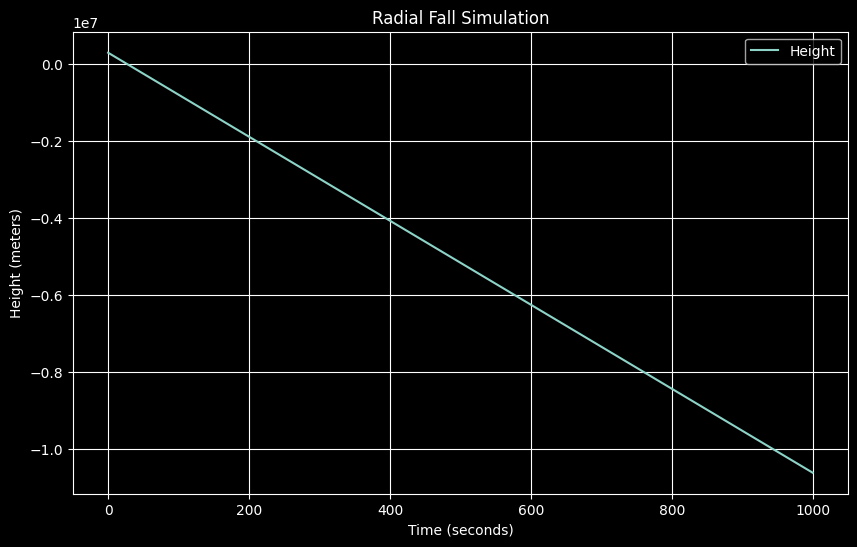

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(timePoints,heightValues,label='Height')
plt.title('Radial Fall Simulation')
plt.xlabel('Time (seconds)')
plt.ylabel('Height (meters)')
plt.legend()
plt.grid(True)
plt.show()

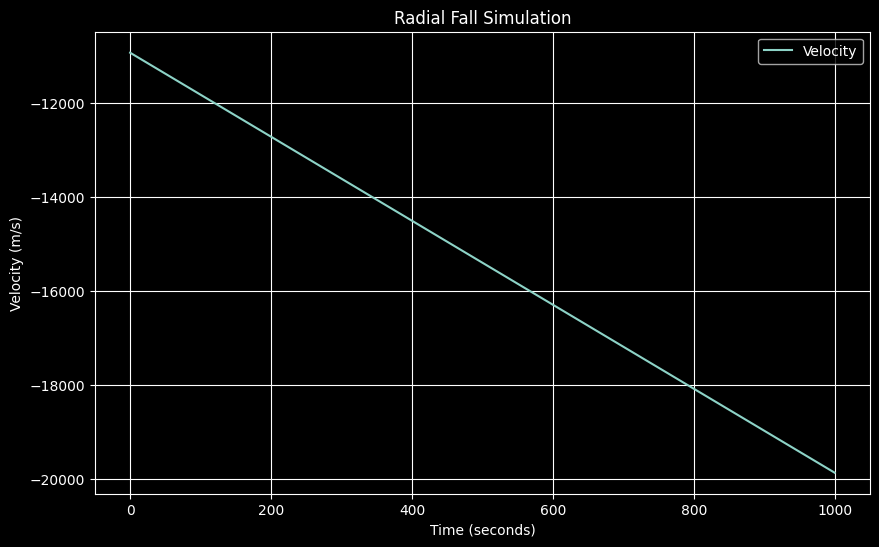

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(timePoints,hFirstIntegrateValues,label='Velocity')
plt.title('Radial Fall Simulation')
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()